In [6]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import statistics
import csv
from numpy.linalg import inv

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.utils import shuffle
from sklearn.metrics import  f1_score as f1, precision_score,recall_score
from collections import defaultdict
from matplotlib import style



# X_train, X_test, Y_train, Y_test = train_test_split(  X, Y, test_size = 0.25,shuffle=True)



In [7]:
## ACCURACY

def accuracy(predicted_output,actual_output):
    l = len(predicted_output)
    out=0
    for i in range(l):
        if(predicted_output[i]==actual_output[i]):
            out=out+1
    return out/l

## PRECISION

def precision(predicted_output,actual_output):
    tp=sum(actual_output)
    fp=0.0
    l = len(predicted_output)
    for i in range(l):
        if(actual_output[i]==0 and predicted_output[i]==1):
            fp=fp+1
    return tp/(tp+fp)
    
    
##RECALL

def recall(predicted_output,actual_output):
    tp=sum(actual_output)
    fn=0.0
    l = len(predicted_output)
    for i in range(l):
        if(actual_output[i]==1 and predicted_output[i]==0):
            fn=fn+1
    return tp/(tp+fn)



##F1 SCORE

def f1_score(predicted_output,actual_output):
    tp=sum(actual_output)
    l = len(predicted_output)
    fp=0.0
    fn=0.0
    for i in range(l):
        if(actual_output[i]==1 and predicted_output[i]==0):
            fn=fn+1
    
    for i in range(l):
        if(actual_output[i]==0 and predicted_output[i]==1):
            fp=fp+1
    return 2*tp/(2*tp+fp+fn)

# PART 1

In [8]:
##ROBOT1
data1 = pd.read_csv("RobotDataset/Robot1",sep= ' ', header = None )

data1.drop(data1.columns[[0]], axis=1, inplace=True)
data1.drop(data1.columns[[7]],axis=1,inplace=True)
data1=shuffle(data1)
c=data1.columns
data1[[c[0], c[6]]] = data1[[c[6], c[0]]]
size1 = len(data1)
train_size1 = (int)(0.8*size1)
train_data1 =data1.head(train_size1)
test_data1 = data1.tail(size1-train_size1)


#ROBOT2
data2 = pd.read_csv("RobotDataset/Robot2",sep= ' ', header = None )
data2.drop(data2.columns[[0]], axis=1, inplace=True)
data2.drop(data2.columns[[7]], axis=1,inplace=True)
data2=shuffle(data2)

c=data2.columns
data2[[c[0], c[6]]] = data2[[c[6], c[0]]]
size2 = len(data2)
train_size2 = (int)(0.8*size2)
train_data2 =data2.head(train_size2)
test_data2 = data2.tail(size2-train_size2)

#IRIS
iris = pd.read_csv("Iris/Iris.csv",delimiter = ',' , header = None )
iris=shuffle(iris)
size_iris = len(iris)
train_size_iris = (int)(0.8*size_iris)
train_data_iris =iris.head(train_size_iris)
test_data_iris = iris.tail(size_iris-train_size2)


In [9]:
def euclidian(A,B):
    x = [A]
    y=[B]
    
    a=euclidean_distances(x, y)
    return a[0][0]
   
def manhattan(A,B):
    a = distance.cityblock(A,B)
    return a

def cosine(A,B):
    a = distance.cosine(A,B)
    return a

    






In [10]:
def knn_neighbour(train_data,test_data,k,dist_fun):
    train_sz = len(train_data)

    test_sz = len(test_data)
    columns = len(train_data.values[0])
    actual_output=[]
    predicted_output=[]
    
    for i in range(test_sz):
        actual_output.append(test_data.values[i][columns-1])
    
    for i in range(test_sz):
        test=[]
        distance_values=[]
        for j in range(columns-1):
            test.append(test_data.values[i][j])
            
        distance_values=[]   
        for j in range(train_sz):
            tr = []
            
            
            for m in range(columns-1):
                tr.append(train_data.values[j][m])
                
                
            dis=dist_fun(test,tr)
            
            touple =(dis,j)
            distance_values.append(touple)
            
        distance_values.sort()
        k_data =[]
        for x in range(k):
            k_data.append(train_data.values[distance_values[x][1]][columns-1])
            
        
        out=max(k_data,key=k_data.count)
        
        predicted_output.append(out)
        
    return predicted_output,actual_output


To test with custom input send test data as test_data after deleting the  last column for robot1 and robot2 and move output to the last column
For iris just send the test data as test_data_iris in knn_neighbour function

In [11]:
predicted_outp,actual_outp = knn_neighbour(train_data1,test_data1,7,manhattan)
print('ROBOT 1')
print('Accuracy :',accuracy(predicted_outp,actual_outp) )
print('Precision :', precision(predicted_outp,actual_outp))
print('F1 Score :', f1_score(predicted_outp,actual_outp))
print('Recall :', recall(predicted_outp,actual_outp),'\n')

predicted_outp,actual_outp = knn_neighbour(train_data2,test_data2,7,manhattan)
print('ROBOT 2')
print('Accuracy :', accuracy(predicted_outp,actual_outp))
print('Precision :', precision(predicted_outp,actual_outp))
print('F1 Score :', f1_score(predicted_outp,actual_outp))
print('Recall :', recall(predicted_outp,actual_outp),'\n')

predicted_outp,actual_outp = knn_neighbour(train_data_iris,test_data_iris,7,manhattan)
print('IRIS')
print('Accuracy :', accuracy(predicted_outp,actual_outp))
print('Precision :', precision_score(actual_outp,predicted_outp,average='macro'))
print('F1 Score :', f1(predicted_outp,actual_outp,average='macro'))
print('Recall :', recall_score(predicted_outp,actual_outp,average='macro'),'\n')




ROBOT 1
Accuracy : 0.84
Precision : 1.0
F1 Score : 0.8571428571428571
Recall : 0.75 

ROBOT 2
Accuracy : 0.8
Precision : 0.8
F1 Score : 0.8275862068965517
Recall : 0.8571428571428571 

IRIS
Accuracy : 0.9210526315789473
Precision : 0.9185185185185185
F1 Score : 0.9128856624319419
Recall : 0.9185185185185185 



# #ROBOT 1


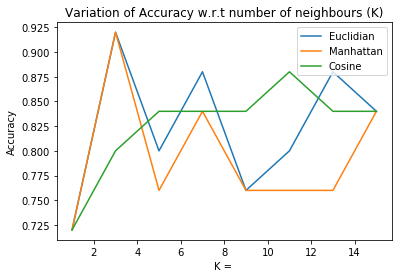

In [12]:

Accuracy =[]
Precision=[]
Recall = []
F1Score = []
K =[]
    
k=1
for i in range(8):
    pred=[]
    actual=[]
    pred,actual=knn_neighbour(train_data1,test_data1,k,euclidian)
    Accuracy.append(accuracy(pred,actual))
    Precision.append(precision(pred,actual))
    Recall.append(recall(pred,actual))
    F1Score.append(f1_score(pred,actual))
    K.append(k)
    k+=2
        
plt.plot(K, Accuracy, label ='Euclidian')
plt.xlabel("K = ")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy w.r.t number of neighbours (K)")
    
    
Accuracy =[]
Precision=[]
Recall = []
F1Score = []
K =[]
    
k=1
for i in range(8):
    pred=[]
    actual=[]
    pred,actual=knn_neighbour(train_data1,test_data1,k,manhattan)
    Accuracy.append(accuracy(pred,actual))
#     Precision.append(precision(pred,actual))
#     Recall.append(recall(pred,actual))
#     F1Score.append(f1_score(pred,actual))
    K.append(k)
    k+=2
        
plt.plot(K, Accuracy, label ='Manhattan')
plt.xlabel("K = ")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy w.r.t number of neighbours (K)")



Accuracy =[]
K =[]
    
k=1
for i in range(8):
    pred=[]
    actual=[]
    pred,actual=knn_neighbour(train_data1,test_data1,k,cosine)
    Accuracy.append(accuracy(pred,actual))
    K.append(k)
    k+=2
        
plt.plot(K, Accuracy, label ='Cosine')
plt.xlabel("K = ")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy w.r.t number of neighbours (K)")


plt.legend()
    
    

    


# ROBOT 2

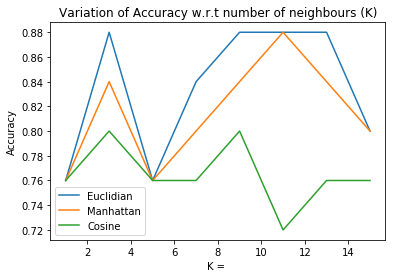

In [13]:
Accuracy =[]
K =[]
    
k=1
for i in range(8):
    pred=[]
    actual=[]
    pred,actual=knn_neighbour(train_data2,test_data2,k,euclidian)
    Accuracy.append(accuracy(pred,actual))
    K.append(k)
    k+=2
        
plt.plot(K, Accuracy, label ='Euclidian')
plt.xlabel("K = ")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy w.r.t number of neighbours (K)")
    
    
Accuracy =[]

K =[]
    
k=1
for i in range(8):
    pred=[]
    actual=[]
    pred,actual=knn_neighbour(train_data2,test_data2,k,manhattan)
    Accuracy.append(accuracy(pred,actual))
    K.append(k)
    k+=2
        
plt.plot(K, Accuracy, label ='Manhattan')
plt.xlabel("K = ")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy w.r.t number of neighbours (K)")



Accuracy =[]
K =[]
    
k=1
for i in range(8):
    pred=[]
    actual=[]
    pred,actual=knn_neighbour(train_data2,test_data2,k,cosine)
    Accuracy.append(accuracy(pred,actual))
    K.append(k)
    k+=2
        
plt.plot(K, Accuracy, label ='Cosine')
plt.xlabel("K = ")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy w.r.t number of neighbours (K)")


plt.legend()

# IRIS

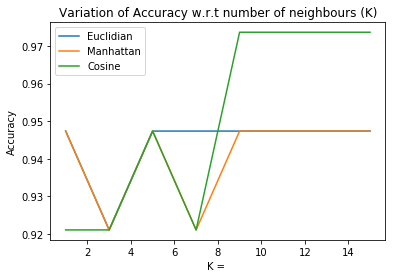

In [14]:
Accuracy =[]
K =[]
    
k=1
for i in range(8):
    pred=[]
    actual=[]
    pred,actual=knn_neighbour(train_data_iris,test_data_iris,k,euclidian)
    Accuracy.append(accuracy(pred,actual))
    K.append(k)
    k+=2
        
plt.plot(K, Accuracy, label ='Euclidian')
plt.xlabel("K = ")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy w.r.t number of neighbours (K)")
    
    
Accuracy =[]

K =[]
    
k=1
for i in range(8):
    pred=[]
    actual=[]
    pred,actual=knn_neighbour(train_data_iris,test_data_iris,k,manhattan)
    Accuracy.append(accuracy(pred,actual))
    K.append(k)
    k+=2
        
plt.plot(K, Accuracy, label ='Manhattan')
plt.xlabel("K = ")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy w.r.t number of neighbours (K)")



Accuracy =[]
K =[]
    
k=1
for i in range(8):
    pred=[]
    actual=[]
    pred,actual=knn_neighbour(train_data_iris,test_data_iris,k,cosine)
    Accuracy.append(accuracy(pred,actual))
    K.append(k)
    k+=2
        
plt.plot(K, Accuracy, label ='Cosine')
plt.xlabel("K = ")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy w.r.t number of neighbours (K)")


plt.legend()

# PART 2

In [53]:

loan = pd.read_csv("LoanDataset/data.csv",delimiter = ',' , header = None )
loan=loan.drop(loan.index[0])
loan_len = len(loan)

loan = shuffle(loan)
c=loan.columns
loan[[c[9], c[13]]] = loan[[c[13], c[9]]]
col_size = len(loan.values[0])


loan_train_size =  (int)(0.8*loan_len)
loan_train = loan.head(loan_train_size)
loan_test = loan.tail(loan_len- loan_train_size)


In [54]:
def gaussian(dataset,col,x):
    mean = np.mean(dataset[col])
    
    standard_dev = statistics.stdev(dataset[col])
    
    
    gauss = (1/(math.sqrt(2*math.pi *standard_dev*standard_dev)))*(math.exp(-((x-mean)**2/(2*standard_dev*standard_dev))))
    return gauss
    
    
def categorical_prob(dataset,col,val):
    
    ct = len(dataset[dataset[col]==val])
    
    return ct/len(dataset)
    

In [55]:
def naive_bayes(test_data,train_data):
    col_sz = len(train_data.values[0])
    train_sz = len(train_data)
    test_sz = len(test_data)
    is_category = []
    
    
    for i in range(col_sz-1):
        uniq=len(set(list(train_data[i])))
        if uniq <=4:
            is_category.append(1)
        else:
            is_category.append(0)
       
    
    train1 = train_data[train_data[col_sz-1]!=0.0]
    train0 = train_data[train_data[col_sz-1]==0.0]
    
    predicted_output=[]
    actual_output= list(test_data[col_sz-1])
    
    for i in range(test_sz):
        one =1
        zero = 1
        for j in range(col_sz-1):
            if is_category[j] == 1:
                one = one*(categorical_prob(train1,j,test_data.values[i][j]))
                zero = zero*(categorical_prob(train0,j,test_data.values[i][j]))
                
            else:
                one = one*(gaussian(train1,j,test_data.values[i][j]))
                zero = zero*(gaussian(train0,j,test_data.values[i][j]))
            
        if one > zero:
            predicted_output.append(1.0)
        else:
            predicted_output.append(0.0)
            
           
    return predicted_output,actual_output

for testing with other data pass test data as loan_test after swapping output column with last column in naive_bayes function

In [56]:
predicted_out,actual_out = naive_bayes(loan_test,loan_train)

print('Accuracy :', accuracy(predicted_out,actual_out))
print('Precision :', precision(predicted_out,actual_out))
print('F1 Score :', f1_score(predicted_out,actual_out))
print('Recall :', recall(predicted_out,actual_out))


Accuracy : 0.8911111111111111
Precision : 0.475
F1 Score : 0.608
Recall : 0.8444444444444444


# PART 3 

In [58]:
admission = pd.read_csv("AdmissionDataset/data.csv",delimiter = ',',header=None  )
admission=admission.drop(admission.index[0])
admission = shuffle(admission)
admission_size = len(admission)
ad_train_size =(int)(0.8*admission_size)
ad_train = admission.head(ad_train_size)
ad_test = admission.tail(admission_size - ad_train_size)


In [59]:
def prediction(theta,row):
    output = 0
    row_len = len(row)

    for i in range(row_len-1):
        output+=float(theta[i])*float(row[i])
    return output

In [60]:


def linear_regression(dataset,test):
    dataset=dataset.astype('float')
    test = test.astype('float')
    col_sz = len(dataset.values[0])
    Y = list(dataset[col_sz-1])
    dataset.drop(dataset.columns[[col_sz-1]],axis = 1,inplace = True)
    X = dataset.values
    theta = inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
    
    test_len = len(test)
    mse=0
    mpe=0
    mae=0
    for i in range(test_len):
        o = prediction(theta,test.values[i])
        mse = mse + (o-test.values[i][col_sz-1])**2
        mpe = mpe + (test.values[i][col_sz-1] - o)/test.values[i][col_sz-1]
        mae = mae + abs(o-test.values[i][col_sz-1])
    
    print('COEFFICIENTS : ', theta)
    print('MSE : ',mse/test_len)
    print('MPE : ',mpe/test_len)
    print('MAE :',mae/test_len)
    
    return
        
        
    

    
    
    
    
    
    

In [61]:
linear_regression(ad_train,ad_test)

COEFFICIENTS :  [ 4.61881512e-05 -3.02616690e-03  4.02919980e-03  1.68345861e-02
  8.53095655e-03  2.09676058e-02  1.22187581e-01  5.93102818e-02]
MSE :  0.004637103356962524
MPE :  -0.0032262939354959948
MAE : 0.04965607214645315
